In [1]:
#importing librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
#data read
data = pd.read_excel('5.WardsMeth.xlsx')
print(data)

    x   y
0   4   4
1  12  12
2  15  12
3  24  21


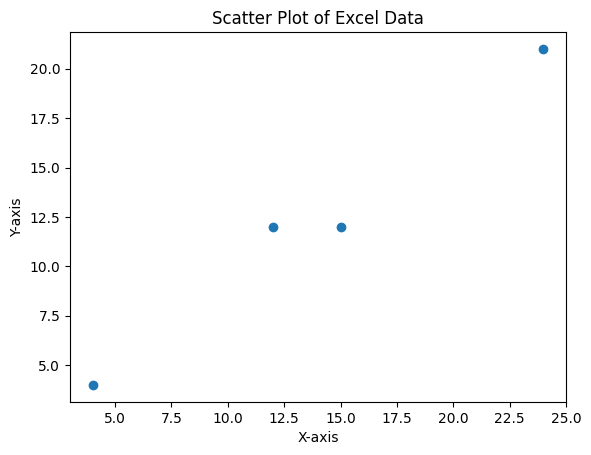

In [6]:
x = data.iloc[:, 0]
y = data.iloc[:, 1]

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Excel Data')
plt.show()

In [3]:
#datapoint gulo ekta list a convert korsi ei part tuku te
x_values = data['x'].tolist()
y_values = data['y'].tolist()
X = [[x, y] for x, y in zip(x_values, y_values)]
print('X=' ,X)

X= [[4, 4], [12, 12], [15, 12], [24, 21]]


In [4]:
#wards method starts here
def ward_clustering(X):
    n = X.shape[0]
    clusters = [[i] for i in range(1, n+1)]
    while len(clusters) > 1:
        min_error = np.inf
        merge_index = (0, 0)
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                error = np.sum((X[np.array(clusters[i])-1][:, None] - X[np.array(clusters[j])-1][None, :])**2)
                if error < min_error:
                    min_error = error
                    merge_index = (i, j)
        clusters.append(clusters[merge_index[0]] + clusters[merge_index[1]])
        del clusters[merge_index[1]]
        del clusters[merge_index[0]]
        variances = []
       # for c in clusters:
           # mean = np.mean(X[np.array(c)-1], axis=0)
           # var = np.sum((X[np.array(c)-1] - mean)**2)
           # variances.append(var)
            # , Variances: {variances}, Error: {min_error
        print(f"Clusters: {clusters}")
    return clusters

X = np.array(X)
ward_clustering(X)


Clusters: [[1], [4], [2, 3]]
Clusters: [[4], [1, 2, 3]]
Clusters: [[4, 1, 2, 3]]


[[4, 1, 2, 3]]

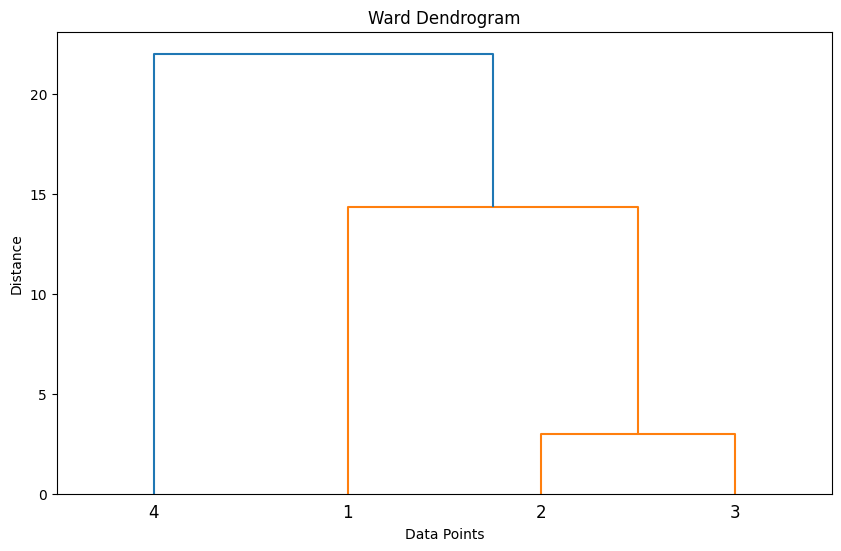

In [5]:
def ward_dendrogram(data, labels):
    linkage_matrix = linkage(data, method='ward')
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix, labels=labels)
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.title('Ward Dendrogram')
    plt.show()
labels = np.arange(1, len(X) + 1)
ward_dendrogram(X, labels)